In [ ]:
# 使用统计学评价两种方法进行验证

In [38]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# 构建两列数据
h = np.linspace(1,10,10,endpoint=True)
y = np.linspace(2,10,10,endpoint=True)

## MAE 平均绝对误差
MAE 全称是MEAN Absolute Error 即平均绝对误差
MAE 的计算公式

$MAE(X, h) = \frac{1}{m}\sum_{i=1}^{m}\left|h_(x_{i})-y_{i}\right|$

In [11]:
# 计算 MAE
diff = y-h
diff_abs = np.abs(diff)
diff_sum = np.sum(diff_abs)
MAE_h_y = diff_sum/len(h)
print("MAE 是：", MAE_h_y)


MAE 是： 5.0


In [12]:
# 优化后代码
MAE_h_y = np.mean(np.abs(y-h))
print("MAE 是：", MAE_h_y)

MAE 是： 5.0


### Sklearn 方法

In [34]:
# sklearn 方法
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,h)
print("sklearn 计算的MAE 是：", MAE_h_y)

sklearn 计算的MAE 是： 5.0


## MAPE 平均绝对百分比误差
相较于 MAE，MAPE 考虑了残差所占原始数据百分比
更加的准确

公式：
MAPE = Average of(abs(Actual-Forecast)/Actual)

$MAPE = \frac{1}{m}\sum_{i=1}^{m}\left|\frac{h-y}{h}\right|$

In [28]:
## 计算 MAPE
MAPE_h_y = np.mean(np.abs((y-h)/h))
print("自定义函数计算得到 MAPE 为：",MAPE_h_y)

自定义函数计算得到 MAPE 为： 0.9214329805996473


### Sklearn 方法

In [35]:
## sklearn 方法
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(h,y)
print("sklearn 计算得到的 MAPE为：",MAPE)

sklearn 计算得到的 MAPE为： 0.9214329805996473


## RMSE 均方根误差 
均方根误差公式

$RMSE(X, h)=\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(h\left(x_{i}\right)-y_{i}\right)^{2}}
$

MAE 是线性分数，所有个体差异在平均值上的权重相等

比如，10和0之间的绝对误差是5和0之间绝对误差的两倍

对于 RMSE 而言不一样，相较于 MAE，RMSE 会对高的差异惩罚更多

In [36]:
## 计算 RMSE
RMSE_h_y = np.sqrt(np.mean((y-h)) ** 2) 
print("均方根误差为：",RMSE_h_y)

均方根误差为： 5.0


### Sklearn 方法

In [37]:
## 计算 RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, h)  # 计算均方误差
rmse = np.sqrt(mse)  # 计算均方根误差

print("RMSE:", rmse)

RMSE: 5.614135598515458


# 连续变量一致性检验

一致性包括：
- 同一组人的两次重复测试，简称组间相关
- 同一批人使用不同仪器测试，验证设备精度
- 同一批人使用不同方法测试，验证预测精度

不同数据类型与统计学方法选择
| 数据类型                             | 统计方法                                            |
| ------------------------------------ | --------------------------------------------------- |
| 名义变量<br />（血型A、B、O）        | Kappa                                               |
| 二分类变量<br />（有无、阴阳）       | Kappa                                               |
| 等级变量<br />严重程度（低、中、高） | 加权Kappa、Kendall 相关系数                         |
| 连续变量<br />（血糖、血压、血脂）   | 组内相关系数（ICC）、Bland-Altman 法、ATE/LER区域法 |


一致性测量方法：
- ICC 组间相关系数
- Bland-Altman图


## ICC 组间相关系数

In [81]:
# 计算 ICC
from scipy.stats import pearsonr
pearsonr_cofficient, p_value = pearsonr(h,y)
print("显著性 p value", p_value)
print("组间相关系数为 pearsonrp_cofficient:", pearsonr_cofficient)

显著性 p value 0.0
组间相关系数为 pearsonrp_cofficient: 1.0


## Bland Altman图像
绘制 Bland Altman图像
连续变量的一致性评价，教你一种图示法『Bland-Altman法』https://www.sohu.com/a/214124227_489312

需要和 medcal 的数据进行验证，确定是 h-y 还是 y-h

ref：Bland JM, Altman DG (1986) Statistical method for assessing agreement between two methods of clinical measurement. The Lancet i:307-310

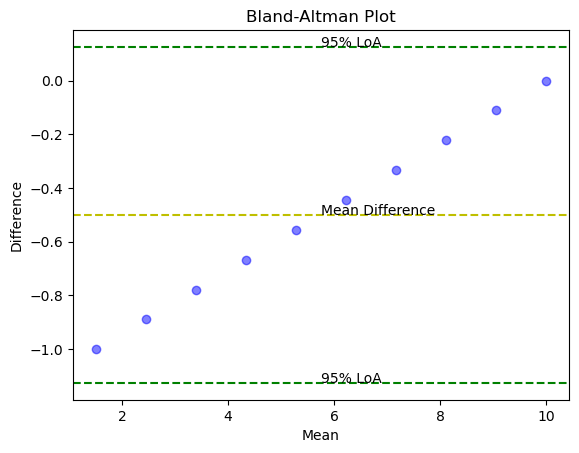

In [74]:
diff = h-y              #差异
mean = (y+h)/2   #平均值
std = np.std(diff)

plt.scatter(mean, diff, c="b", alpha=0.5) #绘制散点图
#绘制上 1.96标准差线（95%置信区间）
plt.axhline(np.mean(diff) + 1.96*std, color="g", linestyle="--") 
plt.annotate("95% LoA", xy=(np.mean(mean),np.mean(diff) + 1.96*std))
#绘制下 1.96标准差线（95%置信区间）
plt.axhline(np.mean(diff) - 1.96*std, color="g", linestyle="--")
plt.annotate("95% LoA", xy=(np.mean(mean),np.mean(diff) - 1.96*std))
plt.axhline(np.mean(diff), color="y", linestyle="--") #绘制平均差线
plt.annotate('Mean Difference', xy=(np.mean(mean), np.mean(diff)))  # 设置水平线标签

plt.xlabel("Mean")      # 设置 x 轴标签
plt.ylabel("Difference") #设置 y 轴标签
plt.title("Bland-Altman Plot") #设置图表标题
plt.show()


In [ ]:
!pip install statsmodels

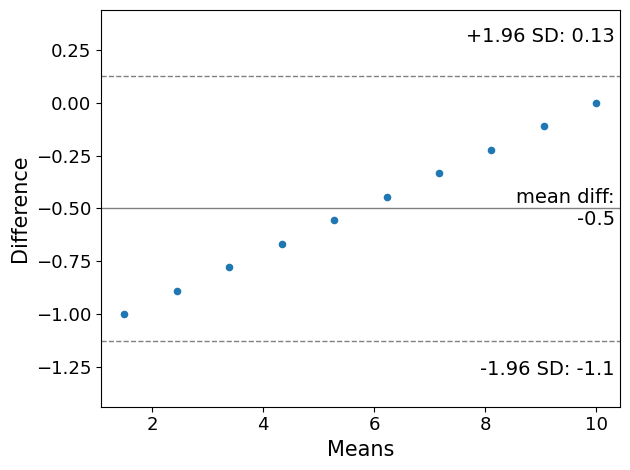

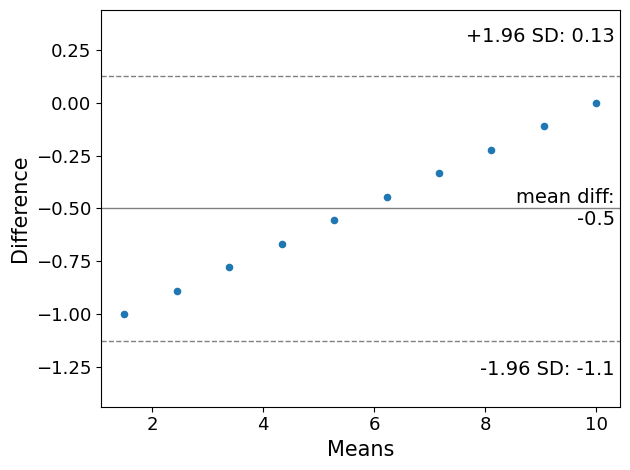

In [76]:
## 使用 Python 现有包绘制 Bland-Altman 公式
import statsmodels.api as sm
sm.graphics.mean_diff_plot(h,y)

## spm1d
尚不理解其在生物力学中如何使用

In [82]:
!pip install spm1d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 3.8 MB/s eta 0:00:0000:0100:010m


'\n- 粗黑线表示统计检验计量连续体，在本例中为 t 连续体或SPM{t}\n- 红色-- 线表示\n\n'

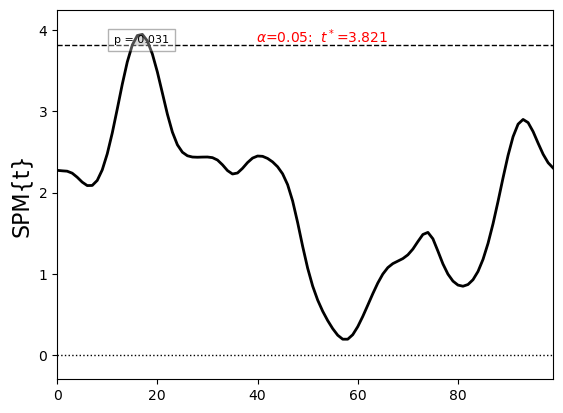

In [87]:
# spm1d 官方示例
# 具体的实例也没有完全跑完
import numpy as np
from matplotlib import pyplot
import spm1d

np.random.seed(0) # 随机数列种子
Y = np.random.randn(10,100) + 0.21 #生成 10 个随机的 1维度数组
Y = spm1d.util.smooth(Y, fwhm=10) #平滑数据集
t = spm1d.stats.ttest(Y) #执行单样本 t 检验，产生 t 检验统计连续体（statistics continuum）
ti = t.inference(alpha=0.05, two_tailed=False) # 执行单尾检验 alpha = 5%

ti.plot() #可视化结果
ti.plot_threshold_label() #临界值标签
ti.plot_p_values() #显示 p 值
'''
- 粗黑线表示统计检验计量连续体，在本例中为 t 连续体或SPM{t}
- 红色-- 线表示 alpha=5%的临界阈值，从经典假设检验来看，如果 SPM{t} 超过此阈值，则原假设在 alpha 处被拒绝
- 概率 p 值表示平滑连续生成与观测聚类一样宽的超阈值聚类的概
    - 这里「平滑」表示与残差连续体相同的平滑度
    - 「宽」表示由超阈值聚类跨越的连续体的比例。
    https://spm1d.org/doc/Theory/tests1d.html#quick-overview

'''

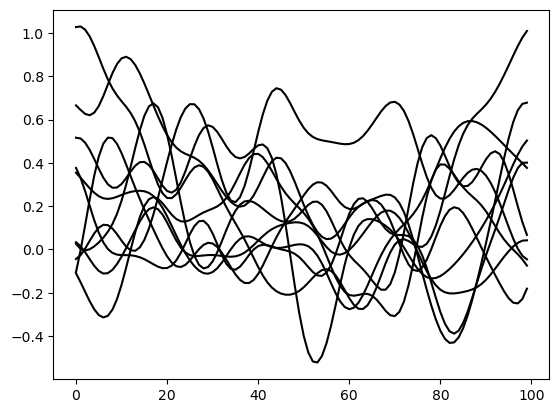

In [88]:
plt.plot(Y.T, color="k")

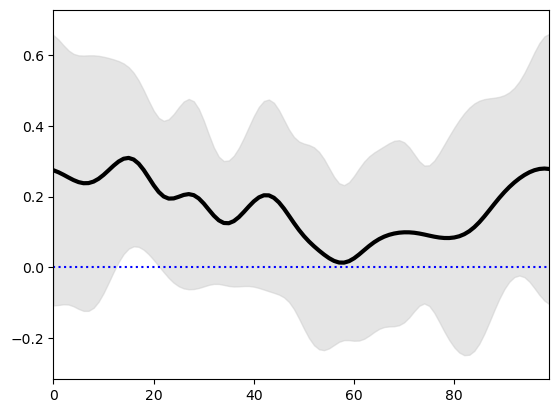

In [91]:
# 平均连续性可以与标准差（SD）一起可视化
spm1d.plot.plot_mean_sd(Y)
pyplot.plot([0,100], [0,0], "b:")